# WeatherPy

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [172]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
from scipy.stats import linregress
from scipy import stats

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes

lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [161]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

620

In [162]:
# Creating empy dataframe to store results from for loop

weather_df = pd.DataFrame({"City" : cities,
                           "Cloudiness" : "",
                           "Country" : "",
                           "Date" : "",
                           "Humidity" : "",
                           "Lat" : "",
                           "Lng" : "",
                           "Max Temp" : "",
                           "Wind Speed" : ""})

weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,eyl,,,,,,,,
1,hermanus,,,,,,,,
2,albany,,,,,,,,
3,dandong,,,,,,,,
4,saint-philippe,,,,,,,,


In [168]:
# Test json response to see where data lives

test_base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "&units=imperial"
test_city = "savannah"

test_url = query_url = test_base_url + "appid=" + api_key + "&q=" + test_city + units

#pprint(requests.get(cleveland_url).json())

response = requests.get(test_url).json()

pprint(response)

{'base': 'stations',
 'clouds': {'all': 1},
 'cod': 200,
 'coord': {'lat': 32.08, 'lon': -81.09},
 'dt': 1552956522,
 'id': 4221552,
 'main': {'humidity': 50,
          'pressure': 1022,
          'temp': 58.8,
          'temp_max': 60.8,
          'temp_min': 57},
 'name': 'Savannah',
 'sys': {'country': 'US',
         'id': 3324,
         'message': 0.0055,
         'sunrise': 1552908660,
         'sunset': 1552952038,
         'type': 1},
 'visibility': 11265,
 'weather': [{'description': 'haze', 'icon': '50n', 'id': 721, 'main': 'Haze'}],
 'wind': {'deg': 200, 'speed': 4.7}}


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [169]:
# Use for loop and iterrows to append data from json to datframe

base_url = "http://api.openweathermap.org/data/2.5/weather?appid=" + api_key + "&units=imperial&q="
units = "&units=imperial"

# to write directly into datafram
for index, row in weather_df.iterrows():
    city = row["City"]
    url = base_url + city
    response = requests.get(url).json()
    print("Processing Record " + str(index) + ": " + city)
    try:
        weather_df.loc[index, "Cloudiness"] = response["clouds"]["all"]
        weather_df.loc[index, "Country"] = response["sys"]["country"]
        weather_df.loc[index, "Date"] = response["dt"]
        weather_df.loc[index, "Humidity"] = response["main"]["humidity"]
        weather_df.loc[index, "Lat"] = response["coord"]["lat"]
        weather_df.loc[index, "Lng"] = response["coord"]["lon"]
        weather_df.loc[index, "Max Temp"] = response["main"]["temp_max"]
        weather_df.loc[index, "Wind Speed"] = response["wind"]["speed"]
    except Exception:
        print("City not found. Skipping...")
        #for deleting row in next steps, does not actually delete the row now
        weather_df.loc[index, "City"] = "delete"
# to test a smaller set of results to make sure loop is working properly
#    if index == 20: 
#        break



Processing Record 0: eyl
Processing Record 1: hermanus
Processing Record 2: albany
Processing Record 3: dandong
Processing Record 4: saint-philippe
Processing Record 5: butaritari
Processing Record 6: longyearbyen
Processing Record 7: porto santo
City not found. Skipping...
Processing Record 8: ushuaia
Processing Record 9: puerto escondido
Processing Record 10: pemangkat
City not found. Skipping...
Processing Record 11: tsihombe
City not found. Skipping...
Processing Record 12: souillac
Processing Record 13: mataura
Processing Record 14: rio grande
Processing Record 15: russell
Processing Record 16: fortuna
Processing Record 17: mys shmidta
City not found. Skipping...
Processing Record 18: asau
City not found. Skipping...
Processing Record 19: hasaki
Processing Record 20: bluff
Processing Record 21: cap malheureux
Processing Record 22: rafaela
Processing Record 23: nepa nagar
Processing Record 24: new norfolk
Processing Record 25: provideniya
Processing Record 26: farah
Processing Reco

Processing Record 237: tazovskiy
Processing Record 238: ekhabi
Processing Record 239: carballo
Processing Record 240: tasiilaq
Processing Record 241: poopo
Processing Record 242: avarua
Processing Record 243: mahon
Processing Record 244: prince rupert
Processing Record 245: axim
Processing Record 246: binzhou
Processing Record 247: bedford
Processing Record 248: broome
Processing Record 249: imperatriz
Processing Record 250: tiksi
Processing Record 251: sitka
Processing Record 252: atkinson
Processing Record 253: husavik
Processing Record 254: vaitupu
City not found. Skipping...
Processing Record 255: esna
Processing Record 256: chernyy yar
Processing Record 257: kungurtug
Processing Record 258: plouzane
Processing Record 259: siderno
Processing Record 260: gold coast
Processing Record 261: gdov
Processing Record 262: tilichiki
Processing Record 263: hamilton
Processing Record 264: novoagansk
Processing Record 265: roald
Processing Record 266: touros
Processing Record 267: saleaula
Cit

Processing Record 478: garissa
Processing Record 479: ornskoldsvik
Processing Record 480: beya
Processing Record 481: morant bay
Processing Record 482: berikulskiy
City not found. Skipping...
Processing Record 483: zhigansk
Processing Record 484: ratlam
Processing Record 485: grand gaube
Processing Record 486: kardla
Processing Record 487: dibaya
City not found. Skipping...
Processing Record 488: bolungarvik
City not found. Skipping...
Processing Record 489: alto araguaia
Processing Record 490: herran
Processing Record 491: monatele
City not found. Skipping...
Processing Record 492: dawson creek
Processing Record 493: basoko
Processing Record 494: khandyga
Processing Record 495: pisco
Processing Record 496: yerbogachen
Processing Record 497: palu
Processing Record 498: shillong
Processing Record 499: mantua
Processing Record 500: haskovo
Processing Record 501: pietarsaari
City not found. Skipping...
Processing Record 502: shenjiamen
Processing Record 503: olafsvik
City not found. Skipp

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [170]:
# count values in each df column

weather_df.count()

City          620
Cloudiness    620
Country       620
Date          620
Humidity      620
Lat           620
Lng           620
Max Temp      620
Wind Speed    620
dtype: int64

In [171]:
# delete "delete" city rows (cites with no/skipped data)

weather_df = weather_df[weather_df["City"] != "delete"]

# show dataframe

weather_df.sort_values(["Humidity"], ascending=False).head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,eyl,92,SO,1552956830,100,7.98,49.82,76.73,11.59
344,brewster,1,US,1552956838,100,41.76,-70.08,37,3.36
82,les cayes,0,HT,1552956845,100,18.19,-73.75,77.27,9.35
76,saint george,20,GR,1552956197,100,39.45,22.34,54,3.2
309,micheweni,92,TZ,1552956890,100,-4.97,39.83,80.87,8.12


In [173]:
# Kept getting a humidity with an error, removing "iquitos" from dataset

weather_df = weather_df[weather_df["Humidity"] <= 100]

# show dataframe

weather_df.sort_values(["Humidity"], ascending=True).head()

# Export to csv

weather_df.to_csv(output_data_file, index=False, header=True)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

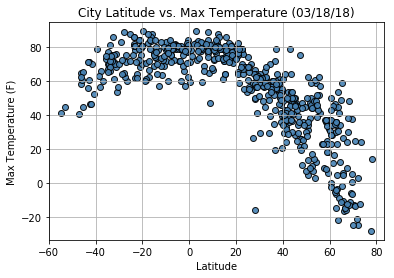

In [192]:
# Create x axis and y axis for plotting

x_axis = weather_df["Lat"]
y_axis = weather_df["Max Temp"]

# Create scatter plot

plt.scatter(x_axis, y_axis, marker="o", facecolors="steelblue", edgecolors = "black", alpha=0.9)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs. Max Temperature (03/18/18)")
plt.xlim(min(x_axis) - 5, max(x_axis) + 5)
plt.ylim(min(y_axis) - 5, max(y_axis) + 5)
plt.grid()

# Save Plot
plt.savefig("../output_data/lat_vs_maxtemp.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

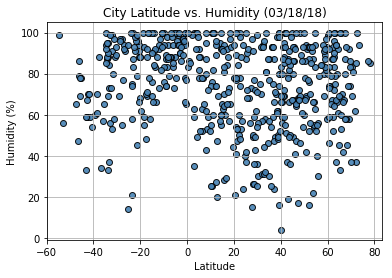

In [193]:
# Create x axis and y axis for plotting

x_axis = weather_df["Lat"]
y_axis = weather_df["Humidity"]

# Create scatter plot

plt.scatter(x_axis, y_axis, marker="o", facecolors="steelblue", edgecolors = "black", alpha=0.9)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (03/18/18)")
plt.xlim(min(x_axis) - 5, max(x_axis) + 5)
plt.ylim(min(y_axis) - 5, max(y_axis) + 5)
plt.grid()

# Save Plot
plt.savefig("../output_data/lat_vs_humidity.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

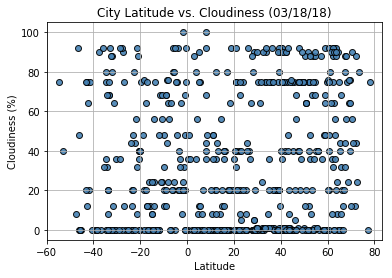

In [194]:
# Create x axis and y axis for plotting

x_axis = weather_df["Lat"]
y_axis = weather_df["Cloudiness"]

# Create scatter plot

plt.scatter(x_axis, y_axis, marker="o", facecolors="steelblue", edgecolors = "black", alpha=0.9)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (03/18/18)")
plt.xlim(min(x_axis) - 5, max(x_axis) + 5)
plt.ylim(min(y_axis) - 5, max(y_axis) + 5)
plt.grid()

# Save Plot
plt.savefig("../output_data/lat_vs_cloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

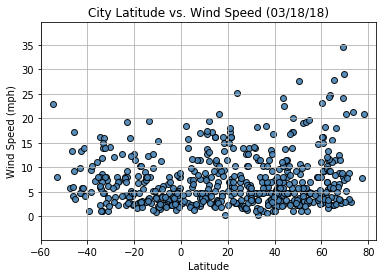

In [195]:
# Create x axis and y axis for plotting

x_axis = weather_df["Lat"]
y_axis = weather_df["Wind Speed"]

# Create scatter plot

plt.scatter(x_axis, y_axis, marker="o", facecolors="steelblue", edgecolors = "black", alpha=0.9)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed (03/18/18)")
plt.xlim(min(x_axis) - 5, max(x_axis) + 5)
plt.ylim(min(y_axis) - 5, max(y_axis) + 5)
plt.grid()

# Save Plot
plt.savefig("../output_data/lat_vs_windspeed.png")

# Show plot
plt.show()

In [196]:
# Testing correlation with absolute Latitudes
linregress(weather_df["Max Temp"].tolist(), [abs(x) for x in weather_df["Lat"].tolist()])

LinregressResult(slope=-0.6321190668721312, intercept=67.73138254328137, rvalue=-0.8198297045106516, pvalue=3.1514948841592947e-137, stderr=0.018690250029825932)

# Findings

The most obvious and strongest correlation is between latitude and max temperature.  As the latitude gets closer to the equator, the max temperature for the day continues to rise, on average.  Then, as the absolute value of the latitude becomes greater, the temperature decreases.  Something interesting to add to this would be altitude of the city, perhaps in represented in bins, and then showin in colors to see if the oultiers are at different heights.

Another finding is there is some sort of correlation (not nearly as strong as with temperature) with latitudes and wind speed.  There are not as many cities as far away from the equator on the south side as there are on the north side of it, but the wind speeds pick up dramatically when looking at the 60 to 80 latitude range.

There are no other very strong correlations between latitude and the other variables, but there are some interesting insights.  The northern latitudes, when moving away from the equator, become much more humid.  This also happens as we move south of the equator, but not as heavily.  This could have something to do with the time of year or abundance of cities to the north of the equator.  The cloud data is interesting as well - there are very strong areas of cloud coverage at either zero and then also at the high end (towards 100%).